## Fast Tag Fraud Detection

#### Problem Statement:

This internship project focuses on leveraging machine learning classification techniques to develop an effective fraud detection system for Fastag transactions. The dataset comprises key features such as transaction details, vehicle information, geographical location, and transaction amounts. The goal is to create a robust model that can accurately identify instances of fraudulent activity, ensuring the integrity and security of Fastag transactions.

### Dataset Description:

1. Transaction_ID: Unique identifier for each transaction.
2. Timestamp: Date and time of the transaction.
3. Vehicle_Type: Type of vehicle involved in the transaction.
4. FastagID: Unique identifier for Fastag.
5. TollBoothID: Identifier for the toll booth.
6. Lane_Type: Type of lane used for the transaction.
7. Vehicle_Dimensions: Dimensions of the vehicle.
8. Transaction_Amount: Amount associated with the transaction.
9. Amount_paid: Amount paid for the transaction.
10. Geographical_Location: Location details of the transaction.
11. Vehicle_Speed: Speed of the vehicle during the transaction.
12. Vehicle_Plate_Number: License plate number of the vehicle.
13. Fraud_indicator: Binary indicator of fraudulent activity (target variable).

In [101]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_fraud = pd.read_csv("D:\\Internship\Mentorness MIP-ML-06\\Project 1- Fact tag Fraud\\FastagFraudDetection.csv")

In [4]:
df_fraud.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [5]:
print('Share before drop duplicate value: ', df_fraud.shape)
df_fraud = df_fraud.drop_duplicates()
print('Share after drop duplicate value: ', df_fraud.shape)

Share before drop duplicate value:  (5000, 13)
Share after drop duplicate value:  (5000, 13)


In [6]:
df_fraud.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [7]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [8]:
df_fraud.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [9]:
df_fraud.nunique()

Transaction_ID           5000
Timestamp                4423
Vehicle_Type                7
FastagID                 4451
TollBoothID                 6
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     5000
Fraud_indicator             2
dtype: int64

In [10]:
df_fraud.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

### Data pre-processing

In [12]:
df_fraud['Timestamp'] = pd.to_datetime(df_fraud['Timestamp'])

In [13]:
df_fraud['Month Name'] = df_fraud['Timestamp'].dt.month_name()

In [14]:
df_fraud['Year'] = df_fraud['Timestamp'].dt.year

In [15]:
df_fraud['Day'] = df_fraud['Timestamp'].dt.day

In [16]:
df_fraud['Week in Year'] = df_fraud['Timestamp'].dt.isocalendar().week

In [17]:
df_fraud['Name of Day'] = df_fraud['Timestamp'].dt.day_name()

In [18]:
df_fraud['Hour'] = df_fraud['Timestamp'].dt.hour

In [19]:
df_fraud['Minutes'] = df_fraud['Timestamp'].dt.minute

In [20]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         5000 non-null   int64         
 1   Timestamp              5000 non-null   datetime64[ns]
 2   Vehicle_Type           5000 non-null   object        
 3   FastagID               4451 non-null   object        
 4   TollBoothID            5000 non-null   object        
 5   Lane_Type              5000 non-null   object        
 6   Vehicle_Dimensions     5000 non-null   object        
 7   Transaction_Amount     5000 non-null   int64         
 8   Amount_paid            5000 non-null   int64         
 9   Geographical_Location  5000 non-null   object        
 10  Vehicle_Speed          5000 non-null   int64         
 11  Vehicle_Plate_Number   5000 non-null   object        
 12  Fraud_indicator        5000 non-null   object        
 13  Mon

In [21]:
df_fraud.nunique()

Transaction_ID           5000
Timestamp                4423
Vehicle_Type                7
FastagID                 4451
TollBoothID                 6
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     5000
Fraud_indicator             2
Month Name                 12
Year                        1
Day                        31
Week in Year               52
Name of Day                 7
Hour                       24
Minutes                    60
dtype: int64

In [22]:
df_fraud['Seasons'] = np.where((df_fraud['Month Name'] == 'January')|(df_fraud['Month Name'] == 'February')|(df_fraud['Month Name'] == 'December'),"Winter", 
np.where((df_fraud['Month Name'] == 'March')|(df_fraud['Month Name'] == 'April')|(df_fraud['Month Name'] == 'May'),"Spring", 
np.where((df_fraud['Month Name'] == 'June')|(df_fraud['Month Name'] == 'July')|(df_fraud['Month Name'] == 'August'),"Summer", 
np.where((df_fraud['Month Name'] == 'September')|(df_fraud['Month Name'] == 'October')|(df_fraud['Month Name'] == 'November'),"Autumn",0))))


In [23]:
df_fraud.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,...,Vehicle_Plate_Number,Fraud_indicator,Month Name,Year,Day,Week in Year,Name of Day,Hour,Minutes,Seasons
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",...,KA11AB1234,Fraud,January,2023,6,1,Friday,11,20,Winter
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",...,KA66CD5678,Fraud,January,2023,7,1,Saturday,14,55,Winter
2,3,2023-01-08 18:25:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",...,KA88EF9012,Not Fraud,January,2023,8,1,Sunday,18,25,Winter
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",...,KA11GH3456,Fraud,January,2023,9,2,Monday,2,5,Winter
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",...,KA44IJ6789,Fraud,January,2023,10,2,Tuesday,6,35,Winter


In [24]:
df_fraud.drop(columns = {'Transaction_ID','FastagID'},inplace = True)

In [25]:
df_fraud.columns

Index(['Timestamp', 'Vehicle_Type', 'TollBoothID', 'Lane_Type',
       'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid',
       'Geographical_Location', 'Vehicle_Speed', 'Vehicle_Plate_Number',
       'Fraud_indicator', 'Month Name', 'Year', 'Day', 'Week in Year',
       'Name of Day', 'Hour', 'Minutes', 'Seasons'],
      dtype='object')

In [26]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              5000 non-null   datetime64[ns]
 1   Vehicle_Type           5000 non-null   object        
 2   TollBoothID            5000 non-null   object        
 3   Lane_Type              5000 non-null   object        
 4   Vehicle_Dimensions     5000 non-null   object        
 5   Transaction_Amount     5000 non-null   int64         
 6   Amount_paid            5000 non-null   int64         
 7   Geographical_Location  5000 non-null   object        
 8   Vehicle_Speed          5000 non-null   int64         
 9   Vehicle_Plate_Number   5000 non-null   object        
 10  Fraud_indicator        5000 non-null   object        
 11  Month Name             5000 non-null   object        
 12  Year                   5000 non-null   int32         
 13  Day

In [27]:
df_fraud.nunique()

Timestamp                4423
Vehicle_Type                7
TollBoothID                 6
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     5000
Fraud_indicator             2
Month Name                 12
Year                        1
Day                        31
Week in Year               52
Name of Day                 7
Hour                       24
Minutes                    60
Seasons                     4
dtype: int64

In [28]:
df_fraud.drop(columns = 'Timestamp',inplace = True)

In [30]:
num_col = df_fraud.select_dtypes(include = ['int','float','uint']).columns
num_col

Index(['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Year', 'Day',
       'Week in Year', 'Hour', 'Minutes'],
      dtype='object')

In [31]:
cat_col = df_fraud.select_dtypes(include = ['object']).columns
cat_col

Index(['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions',
       'Geographical_Location', 'Vehicle_Plate_Number', 'Fraud_indicator',
       'Month Name', 'Name of Day', 'Seasons'],
      dtype='object')

In [32]:
df_fraud.nunique()

Vehicle_Type                7
TollBoothID                 6
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     5000
Fraud_indicator             2
Month Name                 12
Year                        1
Day                        31
Week in Year               52
Name of Day                 7
Hour                       24
Minutes                    60
Seasons                     4
dtype: int64

In [33]:
df_fraud.describe()

,Transaction_Amount,Amount_paid,Vehicle_Speed,Year,Day,Week in Year,Hour,Minutes
count,5000.00000,5000.000000,5000.000000,5000.0,5000.000000,5000.0,5000.000000,5000.000000
mean,161.06200,141.261000,67.851200,2023.0,15.756200,23.9608,11.552800,28.102600
std,112.44995,106.480996,16.597547,0.0,8.783382,15.06431,6.817427,16.934032
min,0.00000,0.000000,10.000000,2023.0,1.000000,1.0,0.000000,0.000000
25%,100.00000,90.000000,54.000000,2023.0,8.000000,11.0,6.000000,15.000000
50%,130.00000,120.000000,67.000000,2023.0,16.000000,22.0,12.000000,30.000000
75%,290.00000,160.000000,82.000000,2023.0,23.000000,36.0,17.000000,45.000000
max,350.00000,350.000000,118.000000,2023.0,31.000000,52.0,23.000000,59.000000


In [34]:
df_fraud[num_col].nunique()

Transaction_Amount    20
Amount_paid           23
Vehicle_Speed         85
Year                   1
Day                   31
Week in Year          52
Hour                  24
Minutes               60
dtype: int64

In [35]:
cat_col_new = ['Year','Day','Week in Year']

In [36]:
num_col = num_col.to_list()

In [37]:
num_col.remove('Year')

In [38]:
num_col.remove('Day')

In [39]:
num_col.remove('Week in Year')

In [40]:
num_col

['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Hour', 'Minutes']

In [43]:
cat_col = cat_col+cat_col_new

In [44]:
cat_col

['Vehicle_Type',
 'TollBoothID',
 'Lane_Type',
 'Vehicle_Dimensions',
 'Geographical_Location',
 'Vehicle_Plate_Number',
 'Fraud_indicator',
 'Month Name',
 'Name of Day',
 'Seasons',
 'Year',
 'Day',
 'Week in Year']

### Univeriate Analysis:-

#### Continuous Column

#### Dist Plot

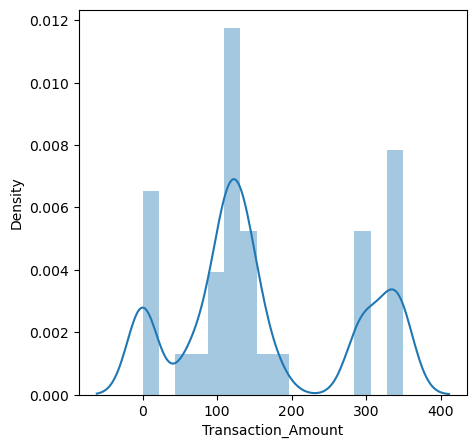

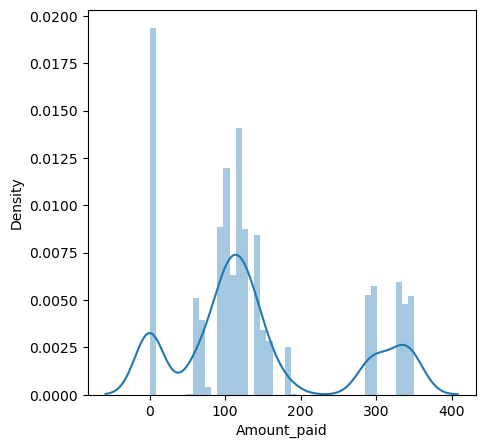

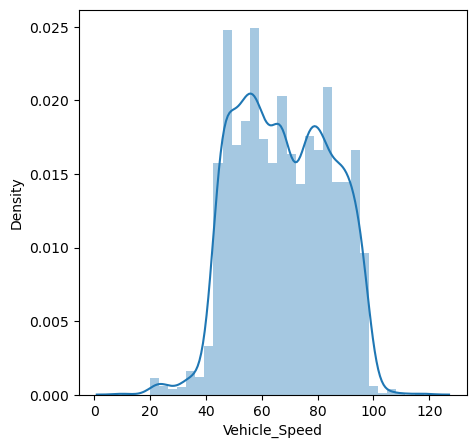

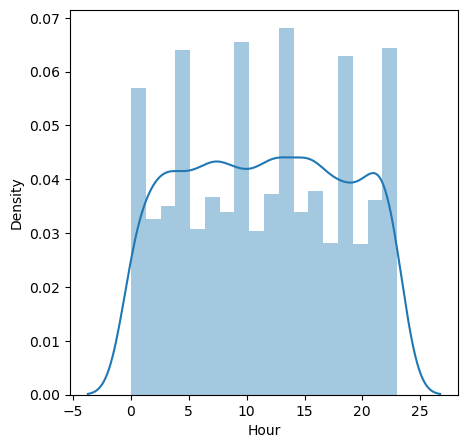

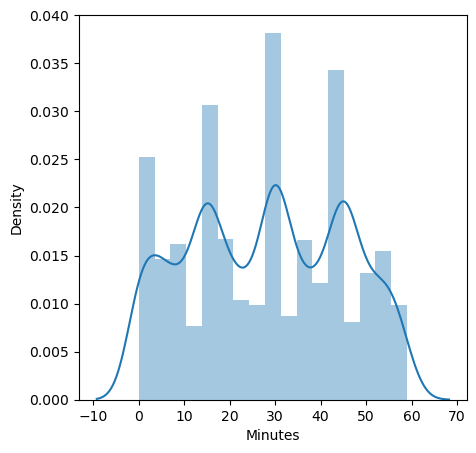

In [45]:
for i in num_col:
    plt.figure(figsize = (5,5))
    sns.distplot(df_fraud[i])

#### KDE

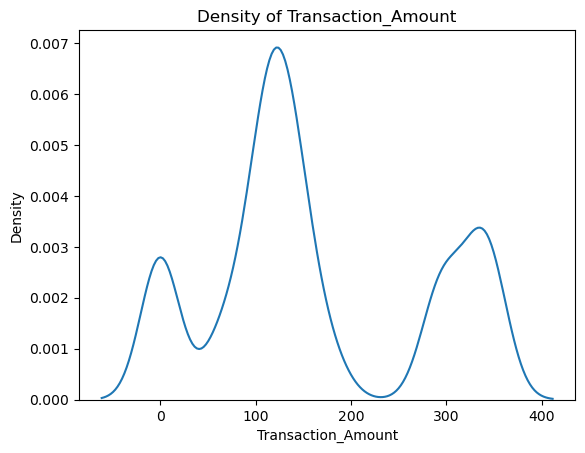

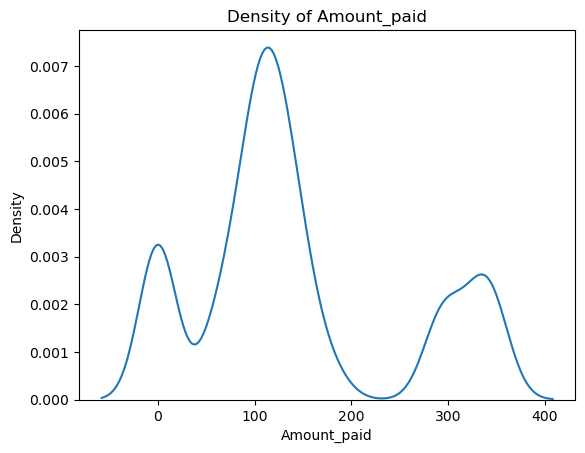

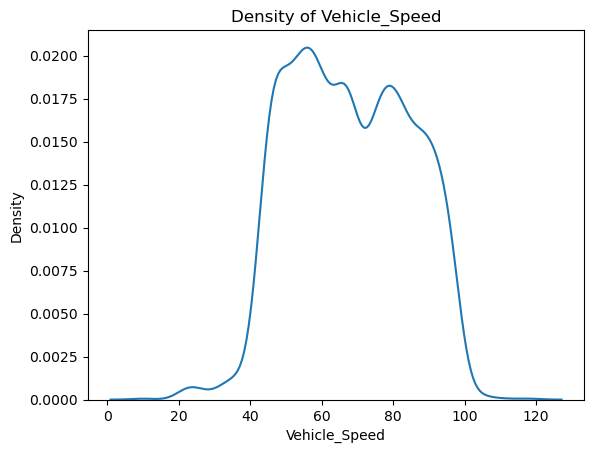

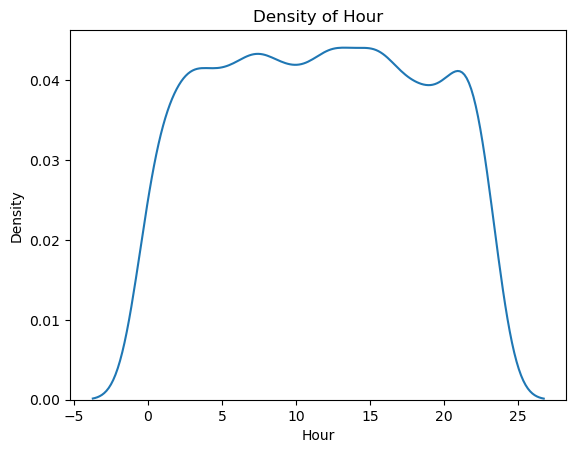

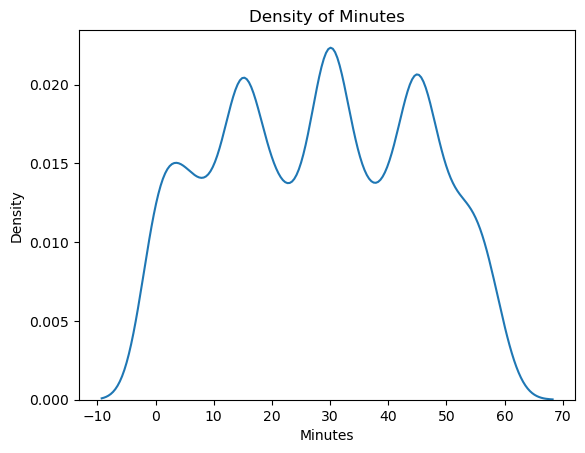

In [46]:
for i in num_col:
    plt.figure(i)
    sns.kdeplot(df_fraud[i])
    plt.title("Density of {}".format(i))

### BOX Plot

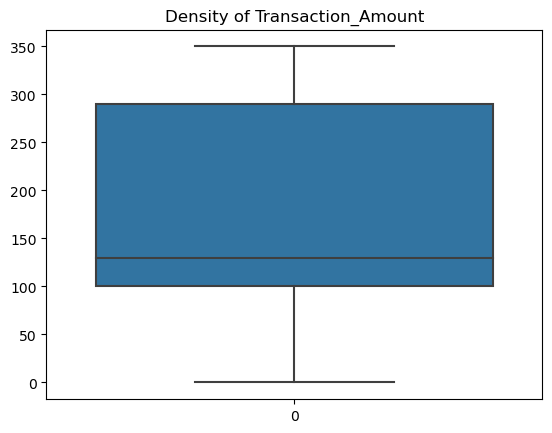

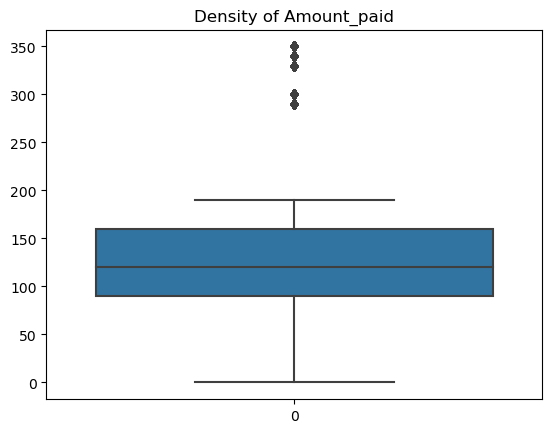

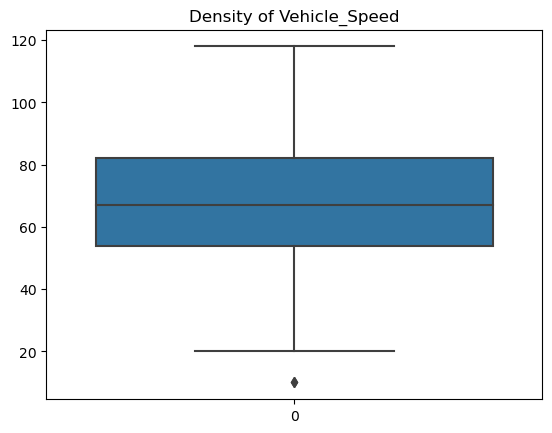

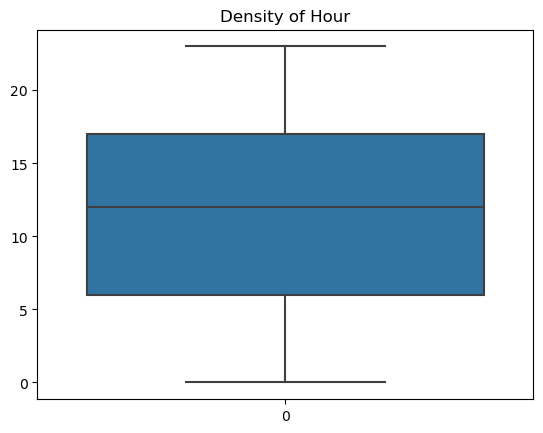

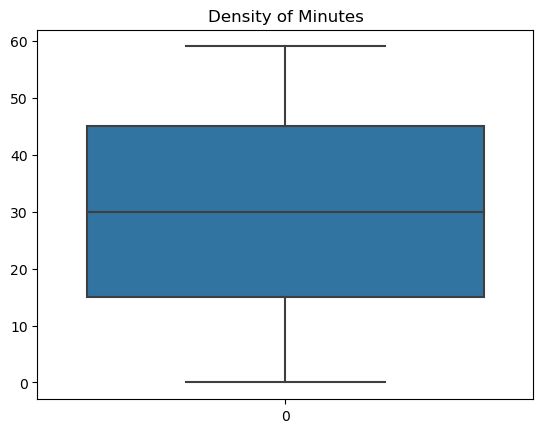

In [47]:
for i in num_col:
    plt.figure(i)
    sns.boxplot(df_fraud[i])
    plt.title("Density of {}".format(i))

#### Checking for Skewness

In [48]:
for i in num_col:
    print("The Skewness value of {} is {}".format(i, round(df_fraud[i].skew(),2)))

The Skewness value of Transaction_Amount is 0.4
The Skewness value of Amount_paid is 0.7
The Skewness value of Vehicle_Speed is 0.0
The Skewness value of Hour is -0.0
The Skewness value of Minutes is -0.0


### Vehicle_Plate_Number is Qualitative data

In [49]:
df_fraud.drop(columns = ['Vehicle_Plate_Number'], inplace  = True)

In [54]:
df_fraud.drop(columns = ['Year'], inplace  = True) #### In year column has the single value So it will not made any difference in model building 

In [52]:
cat_col.remove('Vehicle_Plate_Number')

In [53]:
cat_col.remove('Year')

#### Categorical Columns

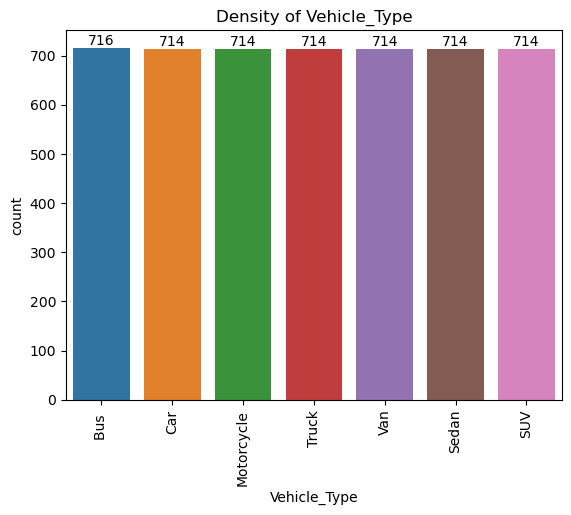

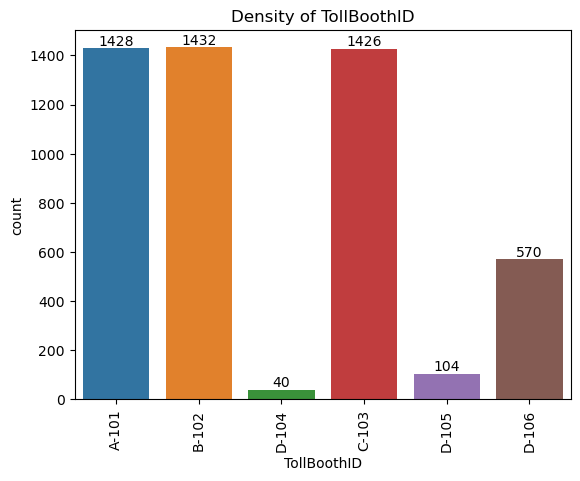

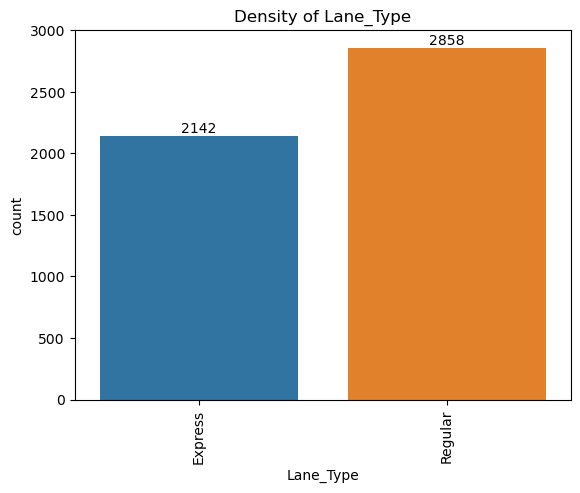

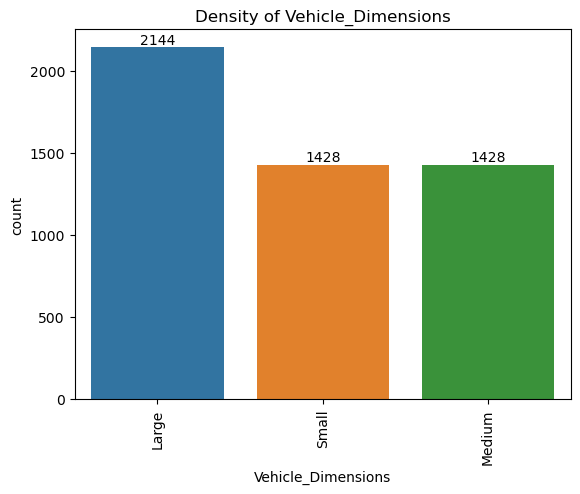

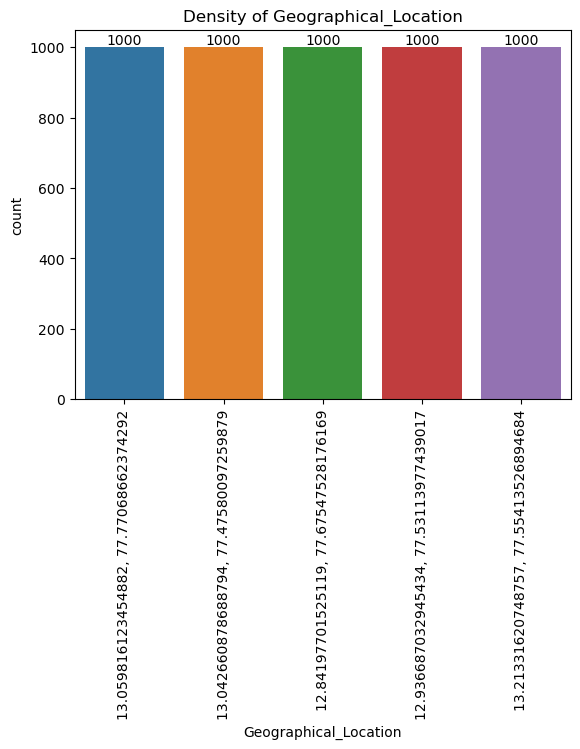

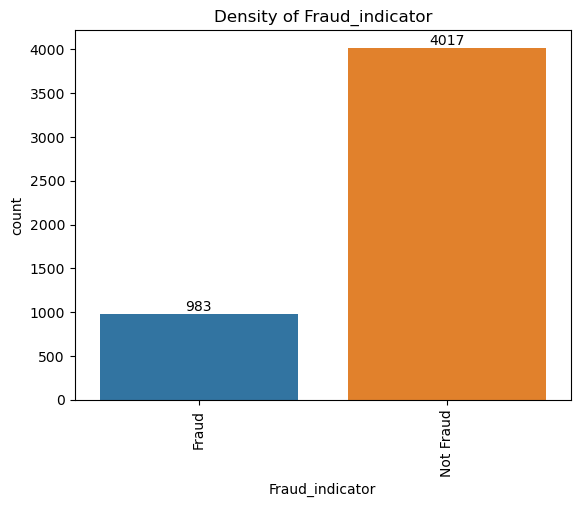

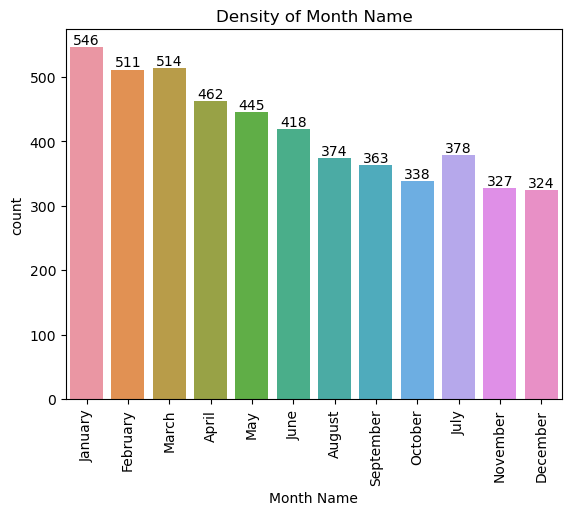

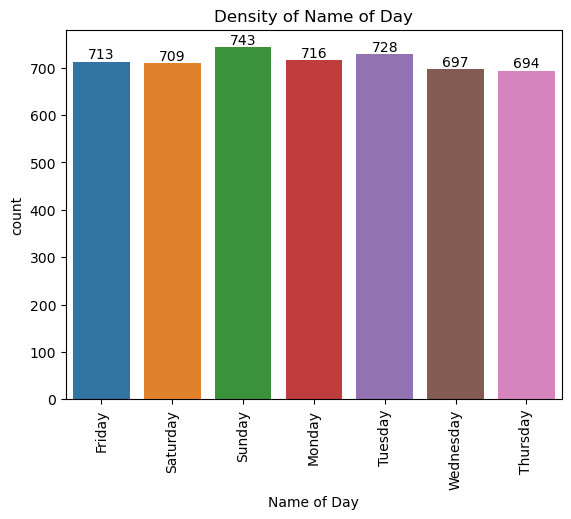

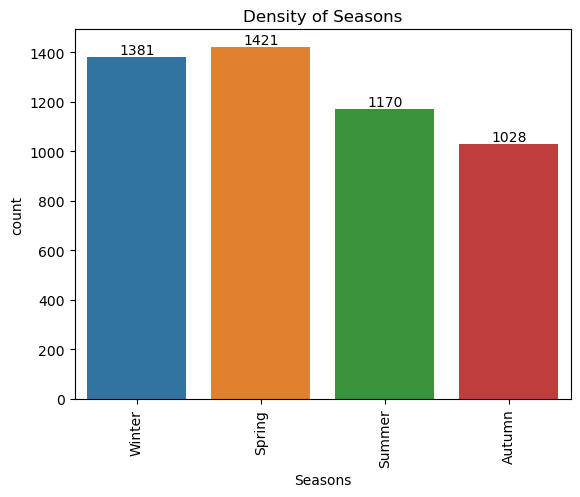

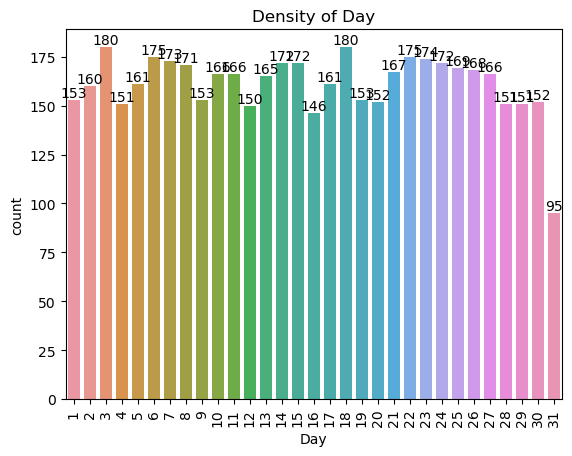

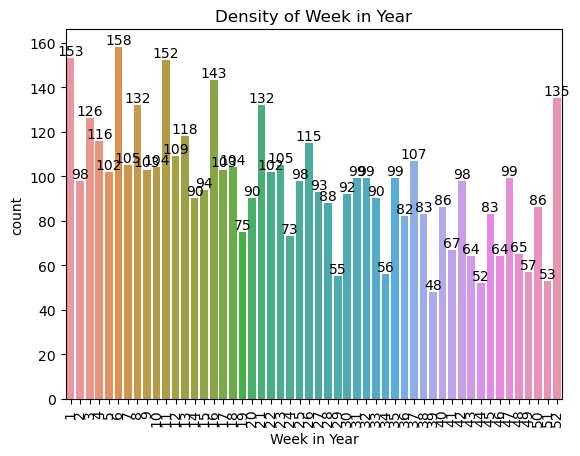

In [55]:
for i in cat_col:
    plt.figure(i)
    ax = sns.countplot(data = df_fraud,x = i)
    
    for j in ax.containers:
        ax.bar_label(j)
        
        plt.xticks(rotation = 'vertical')
        
        plt.title('Density of {}'.format(i))

In [58]:
cat_col.remove('Fraud_indicator') ### Target Column

In [60]:
num_col

['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Hour', 'Minutes']

In [61]:
cat_col

['Vehicle_Type',
 'TollBoothID',
 'Lane_Type',
 'Vehicle_Dimensions',
 'Geographical_Location',
 'Month Name',
 'Name of Day',
 'Seasons',
 'Day',
 'Week in Year']

In [62]:
target = ['Fraud_indicator']

In [63]:
cat_col

['Vehicle_Type',
 'TollBoothID',
 'Lane_Type',
 'Vehicle_Dimensions',
 'Geographical_Location',
 'Month Name',
 'Name of Day',
 'Seasons',
 'Day',
 'Week in Year']

In [64]:
num_col

['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Hour', 'Minutes']

### Biveriate Analysis

#### Continuous Column VS Categorical Column

* Box Plot
* KDE Plot

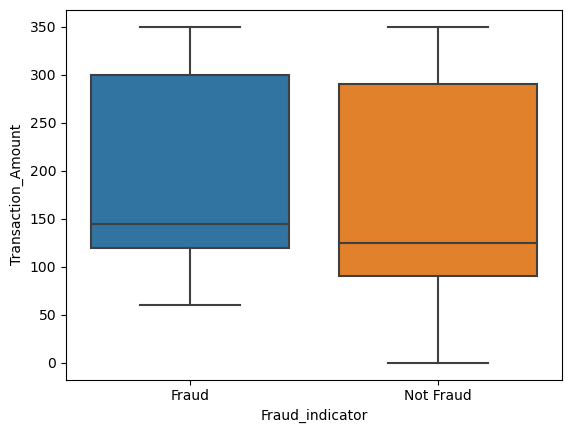

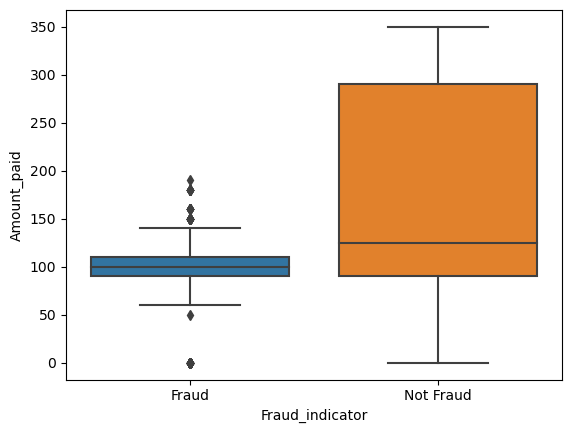

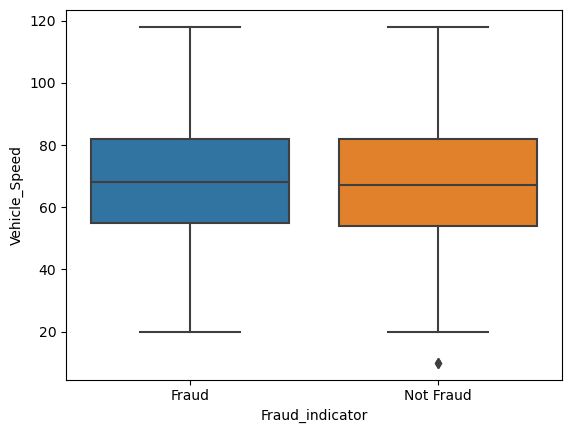

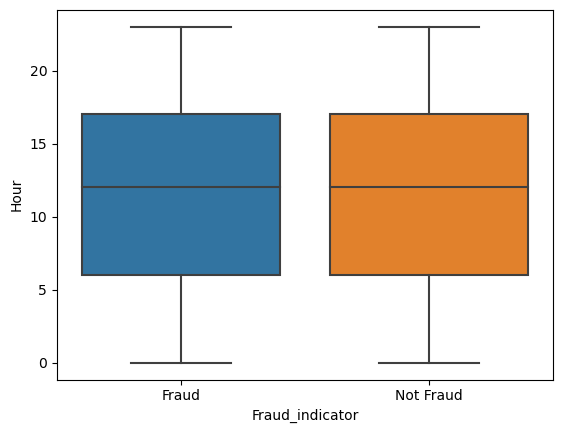

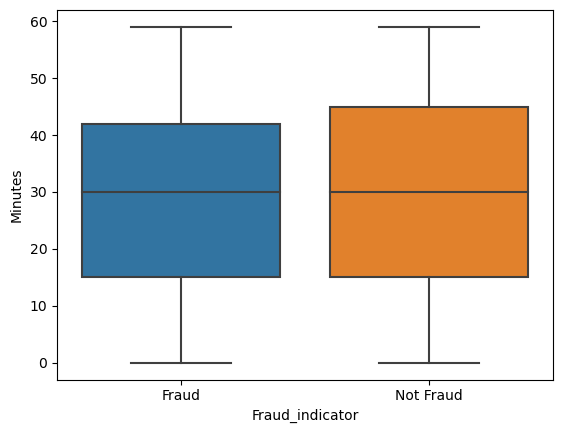

In [72]:
for i in num_col:
    plt.figure()
    sns.boxplot(y = i,x = "Fraud_indicator", data = df_fraud)

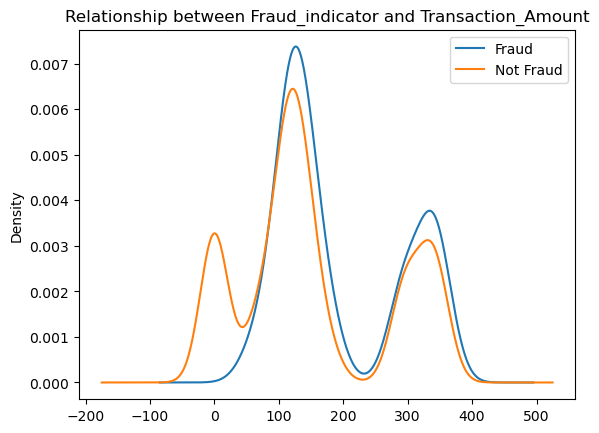

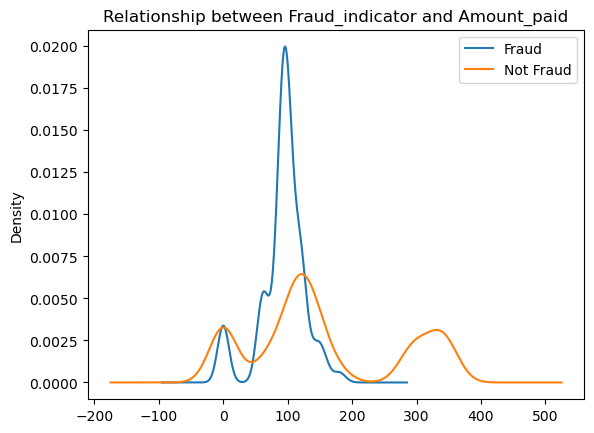

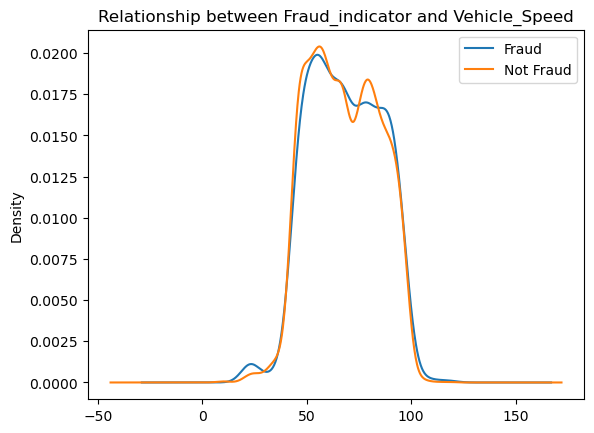

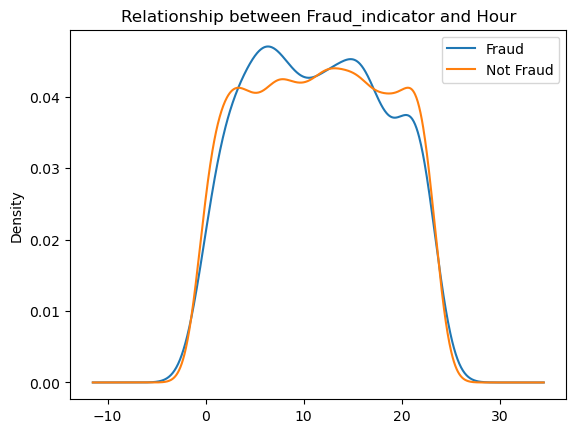

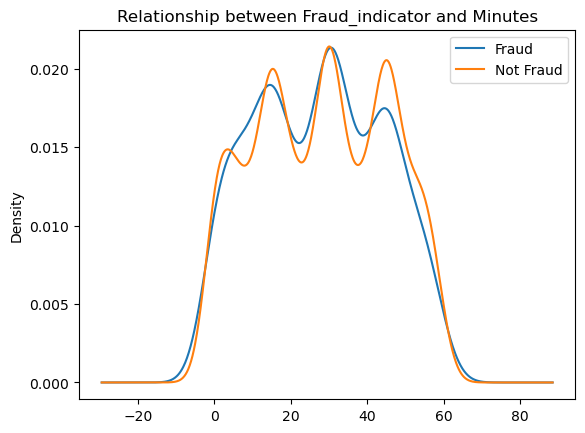

In [80]:
for i in num_col:
    plt.figure()
    df_fraud[df_fraud['Fraud_indicator']== 'Fraud'][i].plot(kind = 'kde', label = 'Fraud')
    df_fraud[df_fraud['Fraud_indicator']== 'Not Fraud'][i].plot(kind = 'kde', label = 'Not Fraud')
    plt.legend()
    plt.title('Relationship between Fraud_indicator and {}'.format(i))

#### Categorical VS Categorical

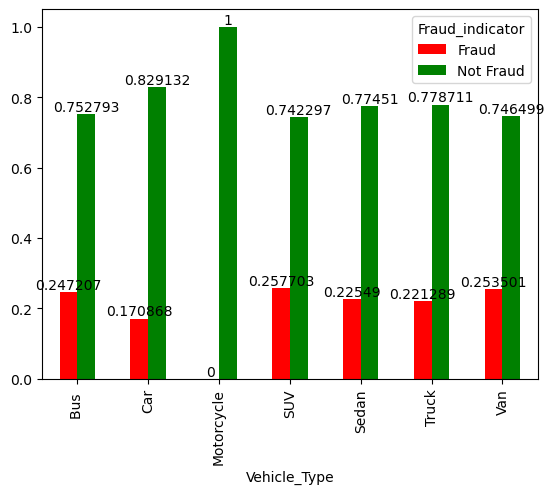

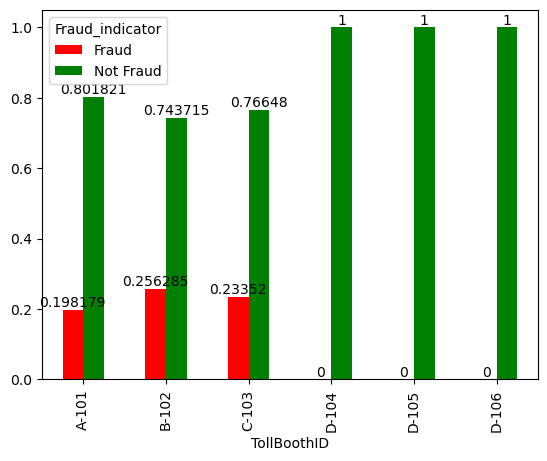

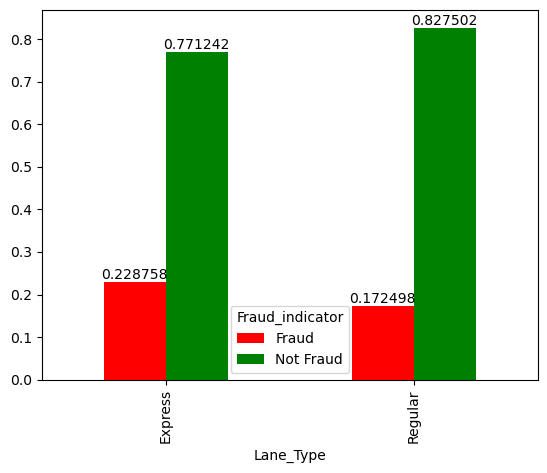

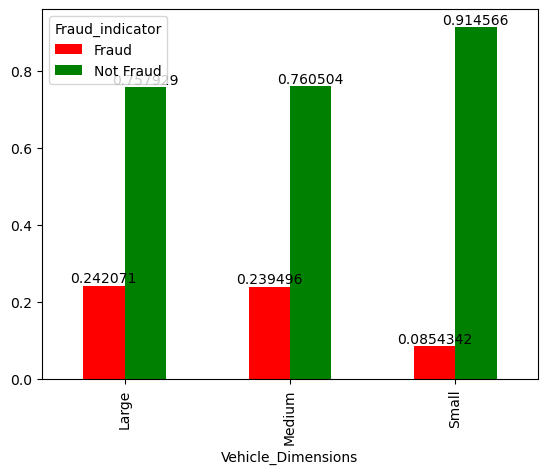

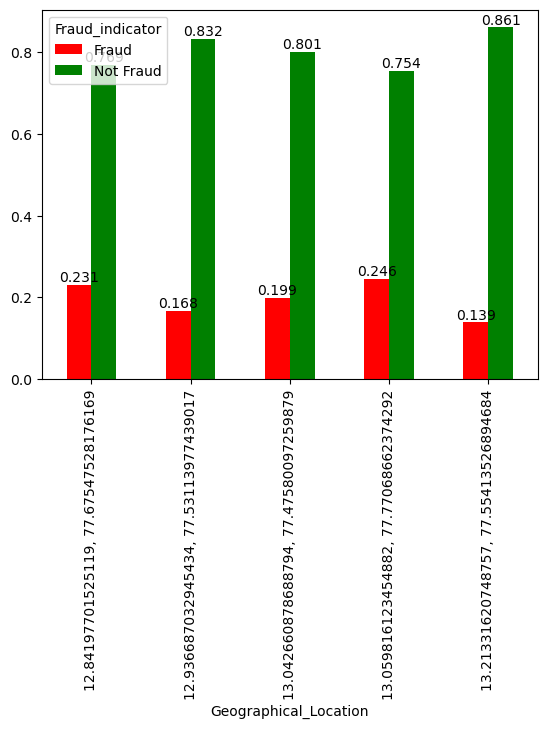

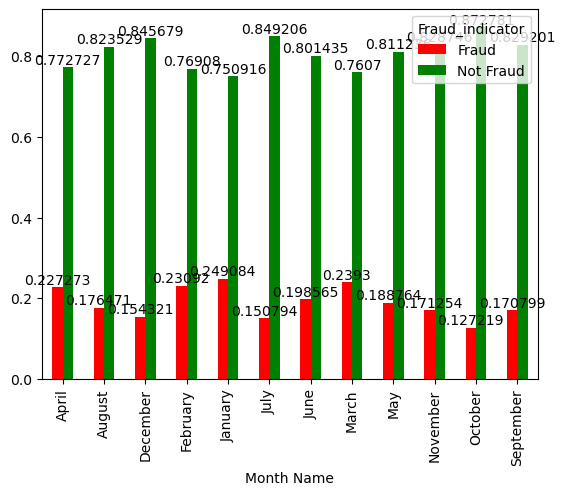

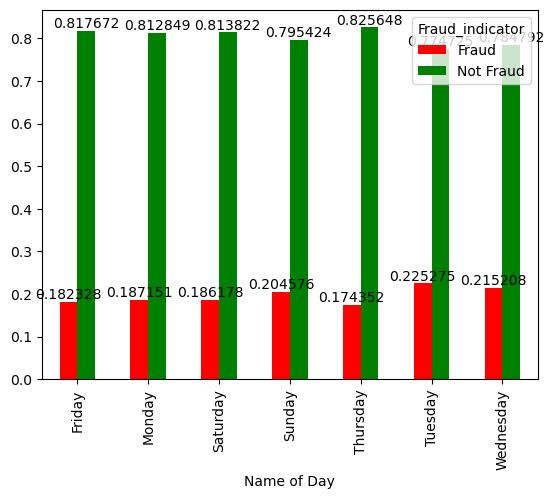

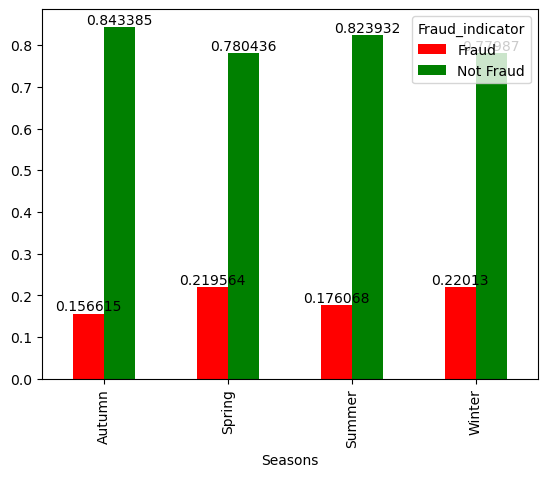

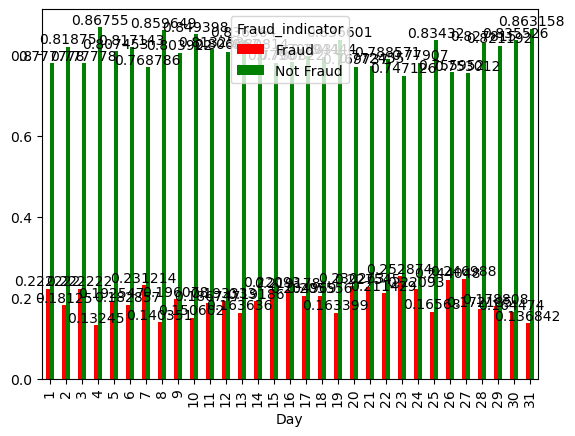

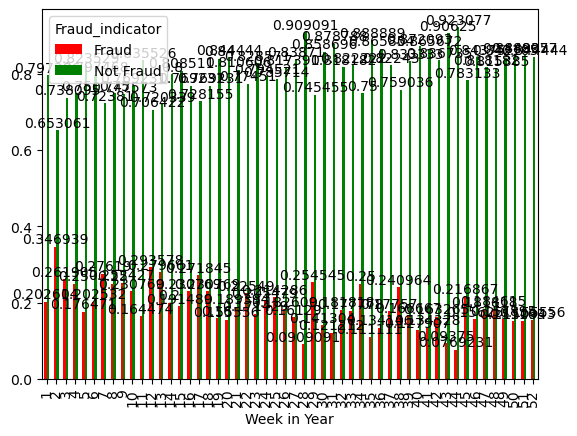

In [87]:

for i in cat_col:
    ax = pd.crosstab(index = df_fraud[i], columns = df_fraud['Fraud_indicator'], normalize = 'index').plot.bar(color = ['red','green'])
    
    for j in ax.containers:
        ax.bar_label(j)

### Creating Categorical Columns

In [98]:
df_fraud['Speed_Type'] = np.where(df_fraud['Vehicle_Speed']<=40,'Normal Speed',
np.where((df_fraud['Vehicle_Speed']>40)&(df_fraud['Vehicle_Speed']<=80),'High Speed',
np.where(df_fraud['Vehicle_Speed']>80,'Very High Speed',0)))


In [113]:
cat_col.append('Speed_Type')

### Feature Selection

#### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [119]:
def Anovatest(inpdata, targetvariable, predictor):
    
    from scipy.stats import f_oneway
    Selected_Col = []
    
    for i in predictor:
        groupdata = df.groupby(targetvariable)[i].apply(list)
        anova_result = f_oneway(*groupdata)
        
        
        if anova_result[1]<0.05:
            Selected_Col.append(i)
            print(i, 'is correlated with',targetvariable,'| P value is',anova_result[1])
        else:
            print(i, 'is not correlated with',targetvariable,'| P value is',anova_result[1])
    return(Selected_Col)

In [120]:
Anovatest(inpdata = df, targetvariable = target, predictor = num_col)

Transaction_Amount is correlated with ['Fraud_indicator'] | P value is 3.0439767702285646e-24
Amount_paid is correlated with ['Fraud_indicator'] | P value is 2.115272646461719e-58
Vehicle_Speed is not correlated with ['Fraud_indicator'] | P value is 0.3022047618006852
Hour is not correlated with ['Fraud_indicator'] | P value is 0.7684867890798894
Minutes is not correlated with ['Fraud_indicator'] | P value is 0.1341597646840993


['Transaction_Amount', 'Amount_paid']

#### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [127]:
def ChiSquare(inpdata,targetvariable,predictor):
    
    from scipy.stats import chi2_contingency
    
    Selected_Col = []
    
    for i in predictor:
        crosstabular = pd.crosstab(index = df[i], columns = df[targetvariable])
        chi_result = chi2_contingency(crosstabular)
        
        if chi_result[1]<0.05:
            Selected_Col.append(i)
            print(i, 'is correlated with',targetvariable,'| P value is',chi_result[1])
        else:
            print(i, 'is not correlated with',targetvariable,'| P value is',chi_result[1])
    return(Selected_Col)    
        

In [128]:
ChiSquare(inpdata = df, targetvariable = 'Fraud_indicator', predictor = cat_col)

Vehicle_Type is correlated with Fraud_indicator | P value is 2.791048100424726e-46
TollBoothID is correlated with Fraud_indicator | P value is 2.0488139445250352e-45
Lane_Type is correlated with Fraud_indicator | P value is 8.771224262158539e-07
Vehicle_Dimensions is correlated with Fraud_indicator | P value is 1.0767994203762957e-34
Geographical_Location is correlated with Fraud_indicator | P value is 5.39935030615341e-10
Month Name is correlated with Fraud_indicator | P value is 4.832980638741588e-06
Name of Day is not correlated with Fraud_indicator | P value is 0.14236197570257117
Seasons is correlated with Fraud_indicator | P value is 3.8239686528488156e-05
Day is not correlated with Fraud_indicator | P value is 0.32507355095363766
Week in Year is correlated with Fraud_indicator | P value is 0.0003673706330081946
Speed_Type is not correlated with Fraud_indicator | P value is 0.5570739868816932


['Vehicle_Type',
 'TollBoothID',
 'Lane_Type',
 'Vehicle_Dimensions',
 'Geographical_Location',
 'Month Name',
 'Seasons',
 'Week in Year']

### Final Selected Columns are below

In [130]:
Final_Selected_Col = ['Transaction_Amount', 'Amount_paid','Vehicle_Type','TollBoothID','Lane_Type','Vehicle_Dimensions','Geographical_Location',
 'Month Name','Seasons','Week in Year']

In [131]:
Final_Selected_Col

['Transaction_Amount',
 'Amount_paid',
 'Vehicle_Type',
 'TollBoothID',
 'Lane_Type',
 'Vehicle_Dimensions',
 'Geographical_Location',
 'Month Name',
 'Seasons',
 'Week in Year']

In [133]:
df_fraud[Final_Selected_Col].head()

,Transaction_Amount,Amount_paid,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Month Name,Seasons,Week in Year
0,350,120,Bus,A-101,Express,Large,"13.059816123454882, 77.77068662374292",January,Winter,1
1,120,100,Car,B-102,Regular,Small,"13.059816123454882, 77.77068662374292",January,Winter,1
2,0,0,Motorcycle,D-104,Regular,Small,"13.059816123454882, 77.77068662374292",January,Winter,1
3,350,120,Truck,C-103,Regular,Large,"13.059816123454882, 77.77068662374292",January,Winter,2
4,140,100,Van,B-102,Express,Medium,"13.059816123454882, 77.77068662374292",January,Winter,2


In [134]:
df_fraud[Final_Selected_Col].columns

Index(['Transaction_Amount', 'Amount_paid', 'Vehicle_Type', 'TollBoothID',
       'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location',
       'Month Name', 'Seasons', 'Week in Year'],
      dtype='object')

In [136]:
DataforML = df[Final_Selected_Col]

In [140]:
DataforML['Fraud_indicator'] = df_fraud['Fraud_indicator']

In [142]:
DataforML.head()

,Transaction_Amount,Amount_paid,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Month Name,Seasons,Week in Year,Fraud_indicator
0,350,120,Bus,A-101,Express,Large,"13.059816123454882, 77.77068662374292",January,Winter,1,Fraud
1,120,100,Car,B-102,Regular,Small,"13.059816123454882, 77.77068662374292",January,Winter,1,Fraud
2,0,0,Motorcycle,D-104,Regular,Small,"13.059816123454882, 77.77068662374292",January,Winter,1,Not Fraud
3,350,120,Truck,C-103,Regular,Large,"13.059816123454882, 77.77068662374292",January,Winter,2,Fraud
4,140,100,Van,B-102,Express,Medium,"13.059816123454882, 77.77068662374292",January,Winter,2,Fraud


In [143]:
DataforML.to_pickle('Fast_Tag.pkl')

In [5]:
DataforML = pd.read_pickle('Fast_Tag.pkl')

In [3]:
DataforML.head()

,Transaction_Amount,Amount_paid,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Month Name,Seasons,Week in Year,Fraud_indicator
0,350,120,Bus,A-101,Express,Large,"13.059816123454882, 77.77068662374292",January,Winter,1,Fraud
1,120,100,Car,B-102,Regular,Small,"13.059816123454882, 77.77068662374292",January,Winter,1,Fraud
2,0,0,Motorcycle,D-104,Regular,Small,"13.059816123454882, 77.77068662374292",January,Winter,1,Not Fraud
3,350,120,Truck,C-103,Regular,Large,"13.059816123454882, 77.77068662374292",January,Winter,2,Fraud
4,140,100,Van,B-102,Express,Medium,"13.059816123454882, 77.77068662374292",January,Winter,2,Fraud


In [4]:
from sklearn.compose import ColumnTransformer

In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [6]:
tarns = ColumnTransformer(transformers = [
    ('trans1',OneHotEncoder(sparse = False,drop = 'first'),['Vehicle_Type','TollBoothID','Lane_Type','Geographical_Location','Seasons']),
    ('trans2',OrdinalEncoder(categories = [['Large','Medium','Small'],['January','February','March','April','May','June','July','August','September','October','November','December']]),['Vehicle_Dimensions','Month Name'])
], remainder = 'passthrough')

In [7]:
X = DataforML.drop(columns = 'Fraud_indicator')

In [8]:
y = DataforML['Fraud_indicator']

In [12]:
X_transform = tarns.fit_transform(X)

In [13]:
X_transform.shape

(5000, 24)

In [14]:
le = LabelEncoder()

In [15]:
y_transform = le.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X_transform,y_transform,test_size = 0.3, random_state = 45)

## Model Parameter selection using GridSearchCV

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [170]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [172]:
LR = LogisticRegression()
param_log = {
    'C':[1,3,5,7],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag','saga'],
    'penalty':['l1','l2']
}

GridsearCV_LR = GridSearchCV(LR,param_log,cv = 5,n_jobs = 1)
GridsearResult_LR = GridsearCV_LR.fit(X_train,y_train)
print('Best Parameter: ',GridsearResult_LR.best_params_)
print('Best Score: ',GridsearResult_LR.best_score_)

Best Parameter:  {'C': 5, 'penalty': 'l2', 'solver': 'sag'}
Best Score:  0.9877142857142858


### Decision Tree

In [174]:
DT = DecisionTreeClassifier()
param_DT = {
    'max_depth':[1,3,5,7],
    'criterion': ['gini', 'entropy']
}

GridsearCV_DT = GridSearchCV(DT,param_DT,cv = 5,n_jobs = 1)
GridsearResult_DT = GridsearCV_DT.fit(X_train,y_train)
print('Best Parameter: ',GridsearResult_DT.best_params_)
print('Best Score: ',GridsearResult_DT.best_score_)

Best Parameter:  {'criterion': 'entropy', 'max_depth': 7}
Best Score:  0.9831428571428571


### AdaBoost

In [175]:
AB = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2))
param_AB = {
    'n_estimators':[100,200,300],
    'learning_rate': [0.1,0.01,0.001]
}

GridsearCV_AB = GridSearchCV(AB,param_AB,cv = 5,n_jobs = 1)
GridsearResult_AB = GridsearCV_AB.fit(X_train,y_train)
print('Best Parameter: ',GridsearResult_AB.best_params_)
print('Best Score: ',GridsearResult_AB.best_score_)

Best Parameter:  {'learning_rate': 0.1, 'n_estimators': 200}
Best Score:  0.9985714285714286


### Random Forest

In [177]:
RF = RandomForestClassifier()
param_RF = {
    'max_depth':[2,3,5,7],
    'criterion':['gini','entropy'],
    'n_estimators': [100,300,200]
}

GridsearCV_RF = GridSearchCV(RF,param_RF,cv = 5,n_jobs = 1)
GridsearResult_RF = GridsearCV_RF.fit(X_train,y_train)
print('Best Parameter: ',GridsearResult_RF.best_params_)
print('Best Score: ',GridsearResult_RF.best_score_)

Best Parameter:  {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 300}
Best Score:  0.9428571428571428


### XGBoost Classifier

In [178]:
XGB = XGBClassifier()
param_XGB = {
    'max_depth':[2,3,5,7],
    'objective':['reg:linear'],
    'n_estimators': [100,300,200],
    'booster':['gbtree','gblinear'],
    'learning_rate':[0.01,0.001,0.1]
}

GridsearCV_XGB = GridSearchCV(XGB,param_XGB,cv = 5,n_jobs = 1)
GridsearResult_XGB = GridsearCV_XGB.fit(X_train,y_train)
print('Best Parameter: ',GridsearResult_XGB.best_params_)
print('Best Score: ',GridsearResult_XGB.best_score_)

[12:02:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscal

### KNN

In [179]:
KNN = KNeighborsClassifier()
param_KNN = {
    'n_neighbors':[2,3,5,7]
}

GridsearCV_KNN = GridSearchCV(KNN,param_KNN,cv = 5,n_jobs = 1)
GridsearResult_KNN = GridsearCV_KNN.fit(X_train,y_train)
print('Best Parameter: ',GridsearResult_KNN.best_params_)
print('Best Score: ',GridsearResult_KNN.best_score_)

Best Parameter:  {'n_neighbors': 2}
Best Score:  0.9968571428571428


### SVM

In [180]:
SVM = svm.SVC(gamma = 'auto')
param_svm = {
    'C':[5,10,20,30],
    'kernel': ['rbf', 'linear','poly', 'sigmoid']
}

GridsearCV_svm = GridSearchCV(SVM,param_svm,cv = 5,n_jobs = 1)
GridsearResult_svm = GridsearCV_svm.fit(X_train,y_train)
print('Best Parameter: ',GridsearResult_svm.best_params_)
print('Best Score: ',GridsearResult_svm.best_score_)

Best Parameter:  {'C': 5, 'kernel': 'poly'}
Best Score:  0.9994285714285714


### Final Model Selection Process

In [19]:
model = {
    'LogisticRegression':LogisticRegression(C= 5, penalty= 'l2',solver= 'sag'),
    'DecisionTreeClassifier':DecisionTreeClassifier(criterion= 'entropy', max_depth= 7),
    'AdaBoost':AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2),learning_rate= 0.1, n_estimators= 200),
    'RandomForest': RandomForestClassifier(criterion =  'gini', max_depth= 7, n_estimators= 300),
    'XGBoost': XGBClassifier(booster =  'gbtree', learning_rate= 0.1, max_depth= 7, n_estimators= 100, objective= 'reg:linear'),
    'KNN': KNeighborsClassifier(n_neighbors =  2),
    'SVM': svm.SVC(gamma = 'auto',C= 5, kernel= 'poly')
}

In [20]:
for i in model:
    print(i)
    clf = model[i].fit(X_train,y_train)
    
    prediction = clf.predict(X_test)
    TestCase = pd.DataFrame()
    TestCase['Actual'] = y_test
    TestCase['Prediction'] = prediction
    
    print(TestCase.head(10))
    
    from sklearn import metrics
    
    print(metrics.classification_report(y_test,prediction))
    print(metrics.confusion_matrix(y_test,prediction))
    
    
    F1_score = metrics.f1_score(y_test,prediction, average = 'weighted')
    print('Test Score:- ',F1_score)
    
    from sklearn.model_selection import cross_val_score
    FinalAccuracyScore = cross_val_score(clf, X_transform, y_transform, cv = 5, scoring = 'f1_weighted')
    
    print('\nAccuracy values for 5-fold Cross Validation:\n',FinalAccuracyScore)
    print('\nFinal Average Accuracy of the model:', round(FinalAccuracyScore.mean(),2))
    print()

LogisticRegression
   Actual  Prediction
0       1           1
1       1           1
2       1           1
3       1           1
4       1           1
5       0           0
6       0           0
7       1           1
8       1           1
9       1           1
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       299
           1       0.98      1.00      0.99      1201

    accuracy                           0.99      1500
   macro avg       0.99      0.97      0.98      1500
weighted avg       0.99      0.99      0.99      1500

[[ 280   19]
 [   0 1201]]
Test Score:-  0.987175207721156

Accuracy values for 5-fold Cross Validation:
 [0.99396477 0.98062974 0.98374029 0.98477091 0.99295153]

Final Average Accuracy of the model: 0.99

DecisionTreeClassifier
   Actual  Prediction
0       1           1
1       1           1
2       1           1
3       1           1
4       1           1
5       0           0
6       0           0
7     

* After checking the accuracy score selected model is SVM. 

#### Machine Learning Pipeline creation

In [21]:
from sklearn.pipeline import make_pipeline

In [22]:
column_trans = ColumnTransformer(transformers = [
    ('trans1',OneHotEncoder(sparse = False,drop = 'first'),['Vehicle_Type','TollBoothID','Lane_Type','Geographical_Location','Seasons']),
    ('trans2',OrdinalEncoder(categories = [['Large','Medium','Small'],['January','February','March','April','May','June','July','August','September','October','November','December']]),['Vehicle_Dimensions','Month Name'])
], remainder = 'passthrough')

In [23]:
SVM = svm.SVC(gamma = 'auto',C= 5, kernel= 'poly')

In [24]:
pipe = make_pipeline(column_trans,SVM)

In [25]:
pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trans1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Vehicle_Type',
                                                   'TollBoothID', 'Lane_Type',
                                                   'Geographical_Location',
                                                   'Seasons']),
                                                 ('trans2',
                                                  OrdinalEncoder(categories=[['Large',
                                                                              'Medium',
                                                                              'Small'],
                                                                             ['January',
                                                                              'February',
                                                                              'March',
                                                                              'April',
                                                                              'May',
                                                                              'June',
                                                                              'July',
                                                                              'August',
                                                                              'September',
                                                                              'October',
                                                                              'November',
                                                                              'December']]),
                                                  ['Vehicle_Dimensions',
                                                   'Month Name'])])),
                ('svc', SVC(C=5, gamma='auto', kernel='poly'))])

In [26]:
y_pred = pipe.predict(X)

In [27]:
y_pred

array(['Fraud', 'Fraud', 'Not Fraud', ..., 'Not Fraud', 'Not Fraud',
       'Fraud'], dtype=object)

In [28]:
import pickle

pickle.dump(pipe,open('SVM_Fast.pkl','wb'))

In [29]:
pipe.predict(X)

array(['Fraud', 'Fraud', 'Not Fraud', ..., 'Not Fraud', 'Not Fraud',
       'Fraud'], dtype=object)

### Checking the predictive analysis

In [40]:
pipe.predict(pd.DataFrame([[150,100,'Car','B-102','Regular','Small','13.059816123454882, 77.77068662374292','January','Winter',1]],columns = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Type', 'TollBoothID',
       'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location',
       'Month Name', 'Seasons', 'Week in Year']))

array(['Fraud'], dtype=object)

### Model Deployment

In [6]:
def ModelDeployment(InputData):
    import pandas as pd
    predictor = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Type', 'TollBoothID',
       'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location',
       'Month Name', 'Seasons', 'Week in Year']
    
    X = InputData[predictor]
    
    import pickle
    
    with open('SVM_Fast.pkl','rb') as readFile:
        predictive_model = pickle.load(readFile)
        readFile.close()
        
    prediction=  predictive_model.predict(X)
    predictionresult = pd.DataFrame(data = prediction, columns = ['Status'])
    
    return(predictionresult)

In [7]:
ModelDeployment(InputData = DataforML)

,Status
0,Fraud
1,Fraud
2,Not Fraud
3,Fraud
4,Fraud
...,...
4995,Not Fraud
4996,Not Fraud
4997,Not Fraud
4998,Not Fraud


### Conclusion:- 

Here I have used SVM as it has given 100% accuracy.